# Chem 576 HW1
## Ziqiao Xu

In [1]:
from sympy import *
from sympy import Rational as frac
from sympy.plotting import plot
from IPython.display import display, HTML
init_printing(use_unicode=True)

## Exercise 1.2

In [2]:
L_0,L,gm,th,E,n,l_0,T,f = symbols('L_0 L gamma theta E n l_0 T f')
S1, S2 = symbols('S1 S2', cls=Function)

##### For Equation of State $S_1(E, L)$

In [3]:
S1_expr = L_0*gm * ((th*E)/L_0)**(frac(1,2)) -\
                L_0*gm*(frac(1,2)*(L/L_0)**2 +(L_0/L)-frac(3,2))

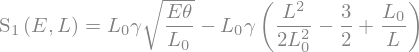

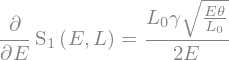

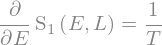

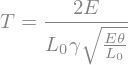

In [4]:
display(
    Eq(S1(E,L), S1_expr),
    Eq(S1(E,L).diff(E), S1_expr.diff(E)),
    Eq(S1(E,L).diff(E), 1/T),
    Eq(T, 1/(S1_expr.diff(E)))
       )

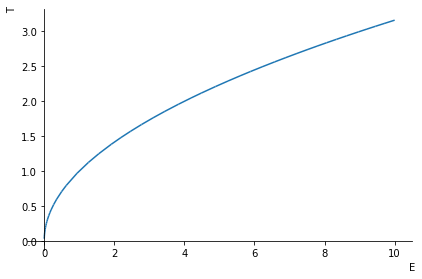

In [5]:
p = plot(E**0.5, ylabel = 'T')

This function is monotonically **increasing**, therefore the equation state is acceptable

##### For Equation of State $S_2(E, L)$

In [6]:
S2_expr = L_0*gm * exp((th*n*E)/L_0) - L_0*gm*(frac(1,2)*(L/L_0)**2 + (L_0/L)-frac(3,2))

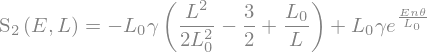

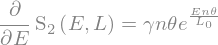

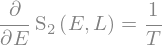

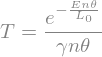

In [7]:
display(
    Eq(S2(E,L), S2_expr),
    Eq(S2(E,L).diff(E), S2_expr.diff(E)),
    Eq(S2(E,L).diff(E), 1/T),
    Eq(T, 1/(S2_expr.diff(E)))
       )

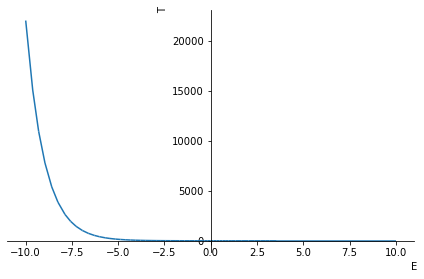

In [8]:
p = plot(exp(-E), ylabel = 'T')

This function is monotonically **decreasing**, therefore it is not a valid equation of state.

## Excercise 1.4

Suppose you have two pieces of rubber band, each one obeying the equation of state studied in Exercise 1.2. 
$$S = L_0 \gamma (\theta nE/L_0)^\frac12-L_0\gamma \left[\frac{1}{2}\left(\frac{L}{L_0}\right)^2+\frac{L_0}{L}-\frac32\right], L_0 = nl_0$$
The temperature, length per mole, and mole number for the first piece are $T^{(1)}$, $l^{(1)}$, and $n^{(1)}$ respectively. 
Similarly, the second piece has $T^{(2)}$, $l^{(2)}$, and $n^{(2)}$. <br>
Determine (as a function of these initial thermodynamic properties) the final energies and temperatures of
the two rubber bands if they are held at constant length and placed in thermal contact with one another. 
Neglect thermal convection to the surroundings and mass flow.

--------------------------

#### (1)

In [9]:
T1, T2, Tf, n1, n2, nf, Et = symbols('T^(1) T^(2) T^(f) n^(1) n^(2) n^(f) E_{tot}')

Since $L$ is held constant, $dL = 0$ and $S$ is no longer a function of $L$, <br>
we can use the relationship derived from **Exercise 1.2**

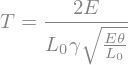

In [10]:
T_expr = 1/(S1_expr.diff(E))
Eq(T,T_expr)

Solve for $E$ we have

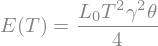

In [11]:
Ef = Function('E')(T)
for sol in solve(Eq(T, T_expr),E):
    display(Eq(Ef, sol))

Since $L_0=nl_0$,

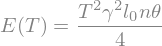

In [12]:
Ef_expr = sol.subs(L_0, n*l_0)
Eq(Ef, Ef_expr)

Since energy is conserved, $E_{tot} = E^{(1)}_{init} + E^{(2)}_{init} = E^{(1)}_{final} + E^{(2)}_{final}$ <br>
Using the expression for $E(T)$ and denote final temperature as $T^{(f)}$, we have

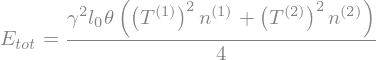

In [13]:
E1f = Ef_expr.subs(T,T1).subs(n,n1)
E2f = Ef_expr.subs(T,T2).subs(n,n2)
Eq(Et, simplify(E1f+E2f))

#### (2)
Since $n^{(f)} = n^{(1)}+n^{(2)}$ and denote final temperature as $T^{(f)}$, we have

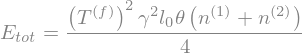

In [14]:
Etf = Ef_expr.subs(T,Tf).subs(n,(n1+n2))
Eq(Et, simplify(Etf))

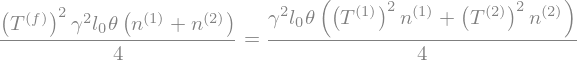

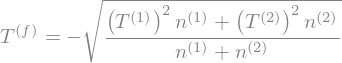

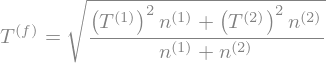

In [15]:
Tf_eqn = Eq(Etf, simplify(E1f+E2f))
display(Tf_eqn)
for sol in solve(Tf_eqn,Tf):
    display(Eq(Tf, sol))

Since $T^{(f)}$ is non-negative,
$$\displaystyle T^{(f)} = \sqrt{\frac{\left(T^{(1)}\right)^{2} n^{(1)} + \left(T^{(2)}\right)^{2} n^{(2)}}{n^{(1)} + n^{(2)}}}$$

## Excercise 1.6

Construct Legendre transforms of the entropy that are natural functions of $(1/T, V, n)$ and of
$(1/T, V, \mu /T)$.

--------------------------------------------------

$$ dE = TdS - pdV + \sum_{i=1}^r \mu_i d n_i $$

We can express $dS$ as

$$ dS = \frac1T dE + \frac{p}{T}dV - \sum_{i=1}^r \frac{\mu_i}{T} d n_i$$

#### (1)
For functions $1/T$ and $E$, the product rule applies that
$$d(\frac1T E) = \frac1TdE+Ed\frac1T$$

Thus,
$$d(S-\frac1T E) = dS-(\frac1TdE+Ed\frac1T)$$

Plug in the expression for $dS$
$$d(S-\frac1T E) = Ed\frac1T + \frac{p}{T}dV - \sum_{i=1}^r \frac{\mu_i}{T} d n_i$$

Here, we have a natural function of $(1/T, V, n)$, namely $S'$, where
$$S'(\frac1T, V, n) = S-\frac1T E$$

#### (2)
Similarly, for functions $\mu_i/T$ and $n_i$

$$d(\sum_{i=1}^r \frac{\mu_i}{T} n_i) = \sum_{i=1}^r \frac{\mu_i}{T} d n_i+\sum_{i=1}^r n_i d \frac{\mu_i}{T}$$ 

Plug in the expression for $dS'$
$$d(S'+ \sum_{i=1}^r \frac{\mu_i}{T} n_i) = d(S-\frac1T E + \sum_{i=1}^r \frac{\mu_i}{T} n_i) = Ed\frac1T + \frac{p}{T}dV +\sum_{i=1}^r n_i d \frac{\mu_i}{T}$$

Here, we have a natural function of $(1/T, V, \mu/T)$, namely $S''$, where
$$S''(\frac1T, V, \frac{\mu}{T}) = S-\frac1T E + \sum_{i=1}^r \frac{\mu_i}{T} n_i$$



## Exercise 1.7

The variational principles associated with the auxiliary functions
H, A, and G are
$$(\Delta H)_{S,p,n}>0,\; (\delta H)_{S,p,n}\geq0,$$
$$(\Delta A)_{T,V,n}>0,\; (\delta A)_{T,V,n}\geq0,$$
$$(\Delta G)_{T,p,n}>0,\; (\delta G)_{T,p,n}\geq0,$$

-------------------------

#### (1)

For enthalpy and entropy, we have
$$dH = TdS +Vdp + \mu dn$$
$$dS = \frac1TdH-Vdp -\mu dn$$
Therefore, $S$ is a natural function of $(H,p,n)$

If we impose internal constraint on the system, and we denote $S_{constr}$ and $S_{equi}$ as the entropy of the system with and without the internal constraint (equilibrium state), from entropy maximum principle, we have,

$$S_{constr}(H,p,n) < S_{equi}(H,p,n)$$

Since the partial derivative of $S$ with repect to $H$ is

$$\left(\frac{\partial S}{\partial H}\right)_{p,n} = \frac{1}{T} > 0$$

The entropy $S(H)$ is a monotonically **increasing** function of entalpy $H$. <br>
Therefore, there exists an entalpy $H'> H$, such that

$$S_{constr}(H',p,n) = S_{equi}(H,p,n) $$

If we denote the difference in enthalpy as $\Delta H$ such that $H' = H+\Delta H$, the above statement can be written as

$$S_{constr}(H+\Delta H,p,n) = S_{equi}(H,p,n) $$

It implies that any variation away from equilibrium state when $(S,p,n)$ are held constant, the system must have 

$$(\Delta H)_{S,p,n} > 0$$

If we apply Taylor expansion on $\Delta H$, we have

$$\Delta H = H(S,p,n;\delta Y)-H(S,p,n;0)$$
$$=(\delta H)_{S,p,n}+(\delta^2 H)_{S,p,n}+ ...$$

where $\delta Y$denotes a variation of internal extensive variable caused by internal constraint. <br>
From the principle $\Delta H >0 $, the first-order variational displacement 

$$(\delta H)_{S,p,n} \geq 0$$

#### (2)

$$A = E - TS$$

Since $\Delta A$ is the change in Hemholtz free energy when the system is moving away from equilibrium (imposing internal constraint) when $(T,V,n)$ are held constant, we can denote the relationship

$$\Delta A = \Delta (E - TS) = \Delta E - T\Delta S$$

Where $\Delta E$ and $\Delta S$ is also the change of energy and entropy when the system is moving away from equilibrium.

From the second law and the variational principle on energy proved in the text book, we know $\Delta S < 0$ and $\Delta E > 0$. Moreover, since $T > 0$,

$$\Delta E - T\Delta S > 0$$
Thus,
$$(\Delta A)_{T,V,n} > 0$$

Similar to **(1)**, using Taylor expansion on $\Delta A$ when $\Delta A >0$, we can show $(\delta A)_{T,V,n} \geq 0$

#### (3)

$$G = E - TS +pV = H-TS$$

Since $\Delta G$ is the change in Gibb's free energy when the system is moving away from equilibrium (imposing internal constraint) when $(T,p,n)$ are held constant, we can denote the relationship

$$\Delta G = \Delta (H - TS) = \Delta H - T\Delta S$$
Where $\Delta H$ and $\Delta S$ is also the change of enthalpy and entropy when the system is moving away from equilibrium.

From the second law and the variational principle on enthalpy proved in **(1)**, we know $\Delta S < 0$ and $\Delta H > 0$. Moreover, since $T > 0$,
$$\Delta H - T\Delta S > 0$$
Thus,
$$(\Delta G)_{T,p,n} > 0$$

Similar to **(1)**, using Taylor expansion on $\Delta G$ when $\Delta G >0$, we can show $(\delta G)_{T,p,n} \geq 0$

## Exercise 1.8
Derive an analogous formula for $(\partial C_p/\partial p)_{T,n}$

---------------------------------------

Let
$$C_p = T\left(\frac{\partial S}{\partial T}\right)_{p,n}$$

Then
$$\left(\frac{\partial C_p}{\partial p}\right)_{T,n} = T\left(\frac{\partial}{\partial p}\left(\frac{\partial S}{\partial T}\right)_{p,n}\right)_{T,n}$$

$$=T\left(\frac{\partial}{\partial T}\left(\frac{\partial S}{\partial p}\right)_{T,n}\right)_{p,n}$$

According to
$$dG = -SdT + Vdp + \mu dn$$
we can derive the relationship,
$$\left(\frac{\partial S}{\partial p}\right)_{T,n} = -\left(\frac{\partial V}{\partial T}\right)_{p,n}$$
Thus,
$$\left(\frac{\partial C_p}{\partial p}\right)_{T,n} = -T\left(\frac{\partial}{\partial T} \left(\frac{\partial V}{\partial T}\right)_{p,n}\right)_{p,n}$$

$$\left(\frac{\partial C_p}{\partial p}\right)_{T,n} = -T \left(\frac{\partial^2 V}{\partial T^2}\right)_{p,n}$$

## Exercise 1.9
Derive this formula
$$\left(\frac{\partial x}{\partial y}\right)_{z} = -\left(\frac{\partial x}{\partial z}\right)_{y} \left(\frac{\partial z}{\partial y}\right)_{x}$$

--------------------------

Since
$$dz = \left(\frac{\partial z}{\partial x}\right)_{y}dx + \left(\frac{\partial z}{\partial y}\right)_{x}dy$$

$$ \left(\frac{\partial z}{\partial x}\right)_{y}dx = dz - \left(\frac{\partial z}{\partial y}\right)_{x} dy $$

$$dx = \left(\frac{\partial x}{\partial z}\right)_{y}dz - \left(\frac{\partial x}{\partial z}\right)_{y} \left(\frac{\partial z}{\partial y}\right)_{x} dy$$

Similarly, we can also treat $x$ as a function of $z$ and $y$ and write $dx$ as
$$dx = \left(\frac{\partial x}{\partial z}\right)_{y}dz + \left(\frac{\partial x}{\partial y}\right)_{z}dy$$

Equate the two expressions,
$$\left(\frac{\partial x}{\partial z}\right)_{y}dz + \left(\frac{\partial x}{\partial y}\right)_{z}dy = \left(\frac{\partial x}{\partial z}\right)_{y}dz - \left(\frac{\partial x}{\partial z}\right)_{y} \left(\frac{\partial z}{\partial y}\right)_{x} dy$$

Simplify the equation, we have
$$\left(\frac{\partial x}{\partial y}\right)_{z} = -\left(\frac{\partial x}{\partial z}\right)_{y} \left(\frac{\partial z}{\partial y}\right)_{x}$$

## Exercise 1.13
Suppose an equation of state for a rubber band is $E =
\theta S^2 L/n^2$, where $\theta$ is a constant, $L$ is the length of the rubber
band, and the other symbols have their usual meaning.
Determine the chemical potential, $\mu(T, L/n)$, and show that
the equation of state satisfies the analog of the Gibbs-Duhem
equation.

------------------------------------------------------------

Assume the rubber band adopts the relationship from **Exercise 1.12** that
$$dE = TdS +fdL + \mu dn$$

In [16]:
E, th, S, L, n, mu, T, f = symbols('E theta S L n mu T f')
Ef = Function('E')(n,S,L)
E_expr = (th*S**2*L)/n**2

For $\mu$ we have

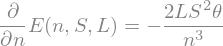

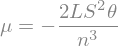

In [17]:
mu_expr = E_expr.diff(n)
display(
    Eq(Derivative(Ef,n),E_expr.diff(n)),
    Eq(mu, mu_expr)
)

For $T$ we have

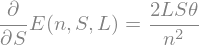

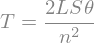

In [18]:
T_expr = E_expr.diff(S)
display(
    Eq(Derivative(Ef,S),E_expr.diff(S)),
    Eq(T, T_expr)
)

Solve for $S$, we have

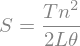

In [19]:
for sol in solve(Eq(T,T_expr),S):
    display(Eq(S,sol))

Therefore

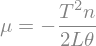

In [20]:
S_expr = solve(Eq(T,T_expr),S)[0]
mu_expr_TLn = mu_expr.subs(S,S_expr)
Eq(mu,mu_expr_TLn)

$=\mu(T,L/n)$

For Gibbs-Duhem equation, express $f$ as a function of $(T, L/n)$

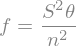

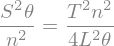

In [21]:
f_expr = E_expr.diff(L)
display(
    Eq(f,f_expr),
    Eq(f_expr,f_expr.subs(S, S_expr)),
)

Thus,
$$f(T,L/n) = \frac{T^{2} n^{2}}{4 L^{2} \theta}$$

$$d\mu = -\frac{nT}{\theta L}dT + \frac{n^2T^2}{2\theta L^2}d(L/n)$$

$$df = \frac{n^2T}{2\theta L^2}dT-\frac{n^3T^2}{2\theta L^3}d(L/n)$$

$$SdT + Ldf + nd\mu = \frac{T n^{2}}{2 L \theta}dT + L\left(  \frac{n^2T}{2\theta L^2}dT-\frac{n^3T^2}{2\theta L^3}d(L/n)\right) + n\left( \frac{nT}{\theta L}dT + \frac{n^2T^2}{2\theta L^2}d(L/n) \right)$$

$$SdT + Ldf + nd\mu = 0$$

## Exercise 1.14

Show that for a one component $p - V - n$ system
$(\partial \mu/\partial \nu)_T = \nu(\partial p/\partial \nu)_T$,
where $\nu$ is the volume per mole.

--------------------------------------

For one-component system,
$$\mu = G/n$$

$$G = n\mu$$
From Gibbs-Duhem equation,
\begin{align}
-SdT + Vdp - nd\mu &= 0 \\
-SdT + Vdp - dG &= 0 \\
\end{align}
Thus,
\begin{align}
dG &= -SdT + Vdp \\
d\mu = \frac{dG}{n} &= -sdT + \nu dp
\end{align}
where $s$ is the molar entropy and $\nu$ is the molar volume

$$\left(\frac{\partial \mu}{\partial \nu}\right)_T = -s\left(\frac{\partial T}{\partial \nu}\right)_T + \nu\left(\frac{\partial p}{\partial \nu}\right)_T$$

Since under constant $T$,
$$\frac{\partial T}{\partial \nu} = 0 $$

$$\left(\frac{\partial \mu}{\partial \nu}\right)_T = \nu\left(\frac{\partial p}{\partial \nu}\right)_T$$

## Exercise 1.15
For a p - V - n system, construct Legendre transforms of the
entropy which are natural functions of $(1/T, V, n)$ and of
$(1/T, V, \mu/T)$. Show that for a one-component system,
$$\left(\frac{\partial E}{\partial \beta}\right)_{\beta\mu,V} = 
-\left(\frac{\partial E}{\partial n}\right)_{\beta,V} 
\left(\frac{\partial n}{\partial \beta\mu}\right)_{\beta,V} 
\left(\frac{\partial \beta \mu}{\partial \beta}\right)_{n,V}
+ \left(\frac{\partial E}{\partial \beta}\right)_{n,V}$$
where $\beta = 1/T$.

----------------

#### (1)

From the derivation performed in **Exercise 1.6**, we have a natural function $S'(1/T, V, n)$ and
a similar natural function $S''(1/T, V, \mu/T)$ for a one-component system, where
\begin{align}
S'(\frac1T, V, n) &= S-\frac1T E \\
S''(\frac1T, V, \frac{\mu}{T}) &= S-\frac1T E + \frac{\mu}{T}n
\end{align}

and
$$dS' = Ed\frac1T + \frac{p}{T}dV - \frac{\mu}{T} d n$$

$$dS'' = Ed\frac1T + \frac{p}{T}dV + nd\frac{\mu}{T}$$

#### (2)
$$
\newcommand{\pdiff}[3]{\left(\frac{\partial #1}{\partial #2}\right)_{#3}}
\newcommand{\diff}[3]{\left(\frac{d #1}{d #2}\right)_{#3}}
$$
From the derivation of Helmholtz energy $A$, we have a natural function of energy with variables $(T, V, n)$.<br>
Thus, through a transformation on the variable $T$, we can construct a function of $E$ with variables $(1/T, V, n)$ 

$$E(1/T, V, n)=E(\beta, V, n)$$

Also, for the function of $n(E, S, V)$,
$$dn = \frac{1}{\mu}dE - \frac{T}{\mu}dS+\frac{p}{\mu}dV $$

and a natural function of $n(1/\mu, T/\mu, V)$ can be constructed by
$$d(n+S\frac{T}{\mu}-E\frac{1}{\mu}) = Ed\frac{1}{\mu} -Sd\frac{T}{\mu}+\frac{p}{\mu}dV$$

Similarly, through relating $\frac{1}{\mu}$ and $\frac{T}{\mu}$ to $\frac{1}{T}$ and $\frac{\mu}{T}$, it is possible to construct a function of $n$,
$$n(1/T,\mu/T,V)=n(\beta, \beta\mu,V)$$

For the function $E(\beta, V, n)$ and a constant $V$, we can express $(dE)_V$ as
$$
(dE)_V = \pdiff{E}{\beta}{n,V}(d\beta)_V + \pdiff{E}{n}{\beta,V}(dn)_V
$$ 

For the function of $n(\beta, \beta\mu,V)$ under constant $V$, 
$$
(dn)_V = \pdiff{n}{\beta}{\beta\mu,V}(d\beta)_V + \pdiff{n}{\beta\mu}{\beta,V}(d\beta\mu)_V
$$

Plug $(dn)_V$ into $(dE)_V$,
$$
(dE)_V = \pdiff{E}{\beta}{n,V}(d\beta)_V + \pdiff{E}{n}{\beta,V}\left[\pdiff{n}{\beta}{\beta\mu,V}(d\beta)_V + \pdiff{n}{\beta\mu}{\beta,V}(d\beta\mu)_V\right]
$$

$$
(dE)_V = \pdiff{E}{\beta}{n,V}(d\beta)_V + \pdiff{E}{n}{\beta,V}\pdiff{n}{\beta}{\beta\mu,V}(d\beta)_V + \pdiff{E}{n}{\beta,V}\pdiff{n}{\beta\mu}{\beta,V}(d\beta\mu)_V
$$

Under constant $\beta\mu$ and $V$, $(d\beta\mu)_V = 0$ and we can drop the last term,
$$
(dE)_{\beta\mu,V} = \pdiff{E}{\beta}{n,V}(d\beta)_{\beta\mu,V} + \pdiff{E}{n}{\beta,V}\pdiff{n}{\beta}{\beta\mu,V}(d\beta)_{\beta\mu,V} 
$$
Thus,
$$
\pdiff{E}{\beta}{\beta\mu,V} = \pdiff{E}{\beta}{n,V} + \pdiff{E}{n}{\beta,V}\pdiff{n}{\beta}{\beta\mu,V}
$$

From **Exercise 1.9** we proved that
$$\left(\frac{\partial x}{\partial y}\right)_{z} = -\left(\frac{\partial x}{\partial z}\right)_{y} \left(\frac{\partial z}{\partial y}\right)_{x}$$
Therefore,
$$
\pdiff{n}{\beta}{\beta\mu,V} = -\pdiff{n}{\beta\mu}{\beta,V}\pdiff{\beta\mu}{\beta}{n,V}
$$

Finally, we have
$$
\pdiff{E}{\beta}{\beta\mu,V} = \pdiff{E}{\beta}{n,V} - \pdiff{E}{n}{\beta,V}\pdiff{n}{\beta\mu}{\beta,V}\pdiff{\beta\mu}{\beta}{n,V}
$$

## Huang  Exercise 1.4
Two isotherms of 1 mol of a substance that can undergo a gas-liquid transition are shown in the accompanying P-V diagram. The absolute temperatures are $T_2$ and $T_1$, respectively. The substance is made to go through one cycle of a cyclic reversible transformation $ABCDEF$ as indicated in the diagram. The following information is given:

1. $ABC$ and $DEF$ are isothermal transformations.
2. $FA$ and $CD$ are adiabatic transformations.
3. In the gas phase $(BCDE)$ the substance is an ideal gas. At $A$ the substance is pure liquid.
4. Latent heat along $AB$: $L = 200 \; cal/mol$

\begin{align}
T_2 &= 300 \;K\\
T_1 &= 150 \;K\\
V_A &= 0.5 \;liter\\
V_B &= 1 \;liter\\
V_C &= 2.71828 \;liter\\
\end{align}

Calculate the next amount of work done by the substance.
![P-V Diagram](./Huang_1.4.PNG)

--------------------------------------------------

Since the cycle only comprises of isothermal and adiabatic transformations, the cycle is a carnot cycle. <br>
For carnot cycle,
$$\eta = 1- \frac{T_{low}}{T_{high}}$$
Let's define $W_{out}$ as work done by the system and
$$\eta = \frac{Q_{in} - Q_{out}}{Q_{in}} = \frac{W_{out}}{Q_{in}}$$

For phase change $A\rightarrow B$, 
$$ Q_{AB} = nL $$
For isotherm $B\rightarrow C$,
$$Q_{BC} = RT_{high}\cdot\log{\frac{V_{high}}{V_{low}}}$$
Thus,
$$
Q_{in} = Q_{AB} + Q_{BC} = nL + RT_2\ln{\frac{V_C}{V_B}}
$$
and 
$$
W_{out} = \eta Q_{in} = \left(1- \frac{T_{1}}{T_{2}}\right) \left(nL + RT_2\ln{\frac{V_C}{V_B}}\right)
$$

Plug values into the equation

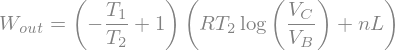

In [22]:
W,T1,T2,nL,R,Vc,Vb = symbols("W_{out} T_1 T_2 nL R V_C V_B")

W_expr = (1-T1/T2)*(nL+R*T2*ln(Vc/Vb))

T1 = 150        # K
T2 = 300        # K
Vb = 1e-3       ## m^3
Vc = 2.71828e-3 ## m^3 
R = 8.3145      ## J*mol^-1*K^-1
nL = 200*4.184  ## J

W_value = (1-T1/T2)*(nL+R*T2*ln(Vc/Vb))

display(
    Eq(W, W_expr),
    Eq(W, W_value)
)

$W_{out} = 1665.57 \;J $

## Huang 1.5
A substance has the following properties:

(i) At a constant temperature $T_0$ the work done by it on expansion from $V_0$ to $V$ is
$$W = RT_0log{\frac{V}{V_0}}$$
(ii) The entropy is given by
$$S = R\frac{V}{V_0}\left(\frac{T}{T_0}\right)^a$$
where $V_0$, $T_0$, and a are fixed constants.

(a) Calculate the Helmholtz free energy<br>
(b) Find the equation of state<br>
(c) Find the work done at an arbitrary constant temperature T.

------------------------------------------------------

#### (a)
For Helmoltz energy,
$$dA = -SdT-pdV+\mu dn$$

Assume $n$ is fix for the given substance,
$$(dA)_n = -SdT-pdV$$


For constant $T = T_0$,
$$A(V, T_0) = -\int_{V_0}^{V}pdV = -RT_0\ln{\frac{V}{V_0}}$$

For constant $V$,
$$A(V, T) = -\int_{T_0}^{T}SdT +g(V) = \left[1-\left(\frac{T}{T_0}\right)^{a+1}\right]\frac{RVT_0}{(a+1)V_0} + g(V)$$

To find $g(V)$, set $T = T_0$ for $A(V,T)$ and comparing to $A(V,T_0)$, we have

$$
A(V, T_0) = 0+ g(V) = -RT_0\ln{\frac{V}{V_0}} \\
A(V, T) = \left[1-\left(\frac{T}{T_0}\right)^{a+1}\right]\frac{RVT_0}{(a+1)V_0} -RT_0\ln{\frac{V}{V_0}}
$$

#### (b)

\begin{align}
P &= -\pdiff{A}{V}{T} \\ 
P &= -\left[1-\left(\frac{T}{T_0}\right)^{a+1}\right]\frac{\partial}{\partial V}\left(\frac{RVT_0}{(a+1)V_0}\right) + \frac{\partial}{\partial V}\left(RT_0\ln{\frac{V}{V_0}}\right) \\
P &= \left[\left(\frac{T}{T_0}\right)^{a+1}-1\right]\frac{RT_0}{(a+1)V_0}+ \frac{RT_0}{V}
\end{align}

#### (C)
\begin{align} 
W &= -\int_{V_0}^{V} pdV \\
W &= -\int_{V_0}^{V} \left[\left(\frac{T}{T_0}\right)^{a+1}-1\right]\frac{RT_0}{(a+1)V_0} dV - \int_{V_0}^{V} \frac{RT_0}{V} dV \\
W &= \left[1-\left(\frac{T}{T_0}\right)^{a+1}\right]\frac{RT_0(V-V_0)}{(a+1)V_0} -RT_0\ln{\frac{V}{V_0}}
\end{align}